Accuracy: 0.75


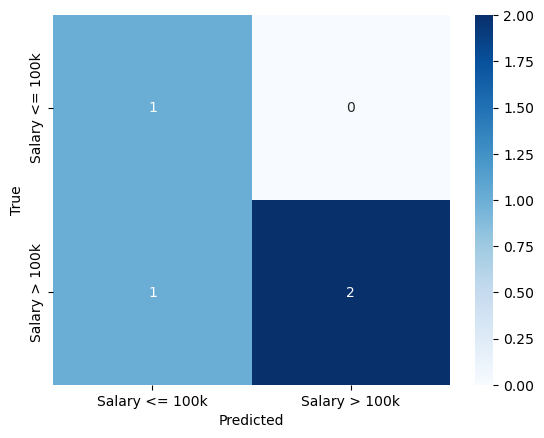

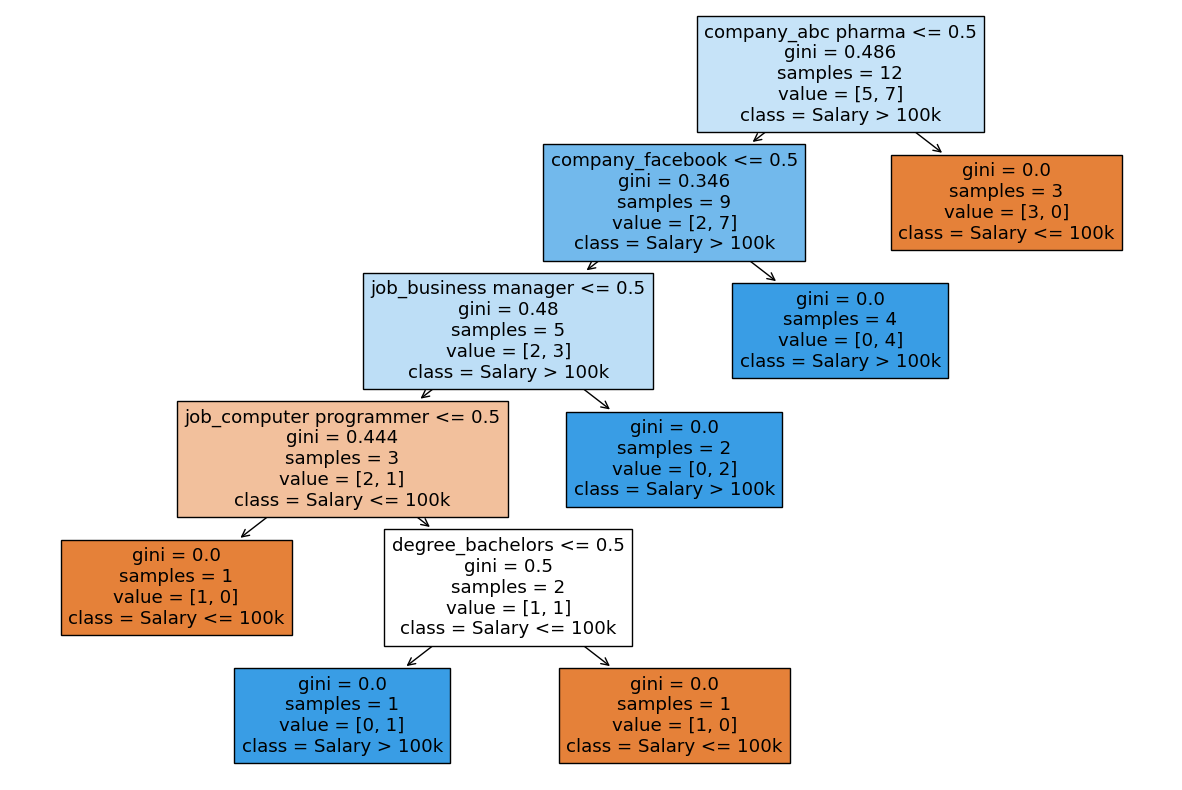

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('salaries.csv')

# Convert column names to lowercase
data.columns = data.columns.str.lower()

# Separate features and labels
X = data.drop('salary_more_then_100k', axis=1)  # Features
y = data['salary_more_then_100k']  # Labels

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=32)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display confusion matrix properly
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix in a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Salary <= 100k', 'Salary > 100k'], yticklabels=['Salary <= 100k', 'Salary > 100k'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# # Display the decision tree rules
# tree_rules = export_text(clf, feature_names=list(X_encoded.columns))
# print(f'Decision Tree Rules:\n{tree_rules}')

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=list(X_encoded.columns), class_names=['Salary <= 100k', 'Salary > 100k'])
plt.show()
